In [1]:
!pip3 install -q torch_snippets
from torch_snippets import * 
from torchvision.datasets import MNIST 
from torchvision import transforms 
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device



/home/delameta/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'cuda'

In [2]:
img_transform = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Normalize([0.5], [0.5]),
    transforms.Lambda(lambda x: x.to(device))
])

In [3]:
trn_ds = MNIST('../public/content/', transform=img_transform, train=True, download=True)
val_ds = MNIST('../public/content/', transform=img_transform, train=False, download=True)

In [4]:
batch_size = 256 
trn_dl = DataLoader(trn_ds, batch_size=batch_size, shuffle=True)
val_dl = DataLoader(val_ds, batch_size=batch_size, shuffle=False)

In [6]:
class AutoEncoder(nn.Module):
    def __init__(self, latent_dim):
        super().__init__()
        self.latent_dim = latent_dim
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(True), 
            nn.Linear(128,64), 
            nn.ReLU(True), 
            nn.Linear(64, latent_dim))
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 64), 
            nn.ReLU(True), 
            nn.Linear(64,128), 
            nn.ReLU(True), 
            nn.Linear(128, 28*28), 
            nn.Tanh())
    
    def forward(self, x):
        x = x.view(len(x), -1)
        x = self.encoder(x)
        x = self.decoder(x)
        x = x.view(len(x), 1, 28, 28)
        return x 
        




In [7]:
!pip3 install torch_summary
from torchsummary import summary 
model = AutoEncoder(3).to(device)
summary(model, torch.zeros(2,1,28,28))

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 10]                  --
|    └─Linear: 2-1                       [-1, 128]                 100,480
|    └─ReLU: 2-2                         [-1, 128]                 --
|    └─Linear: 2-3                       [-1, 64]                  8,256
|    └─ReLU: 2-4                         [-1, 64]                  --
|    └─Linear: 2-5                       [-1, 10]                  650
├─Sequential: 1-2                        [-1, 784]                 --
|    └─Linear: 2-6                       [-1, 64]                  704
|    └─ReLU: 2-7                         [-1, 64]                  --
|    └─Linear: 2-8                       [-1, 128]                 8,320
|    └─ReLU: 2-9                         [-1, 128]                 --
|    └─Linear: 2-10                      [-1, 784]                 101,136
|    └─Tanh: 2-11                        [-1, 784]                 

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 10]                  --
|    └─Linear: 2-1                       [-1, 128]                 100,480
|    └─ReLU: 2-2                         [-1, 128]                 --
|    └─Linear: 2-3                       [-1, 64]                  8,256
|    └─ReLU: 2-4                         [-1, 64]                  --
|    └─Linear: 2-5                       [-1, 10]                  650
├─Sequential: 1-2                        [-1, 784]                 --
|    └─Linear: 2-6                       [-1, 64]                  704
|    └─ReLU: 2-7                         [-1, 64]                  --
|    └─Linear: 2-8                       [-1, 128]                 8,320
|    └─ReLU: 2-9                         [-1, 128]                 --
|    └─Linear: 2-10                      [-1, 784]                 101,136
|    └─Tanh: 2-11                        [-1, 784]                 

EPOCH: 1.000	trn_loss: 0.258	val_loss: 0.160	(18.19s - 891.38s remaining)


100%|██████████| 151/151 [00:00<00:00, 11236.01it/s]


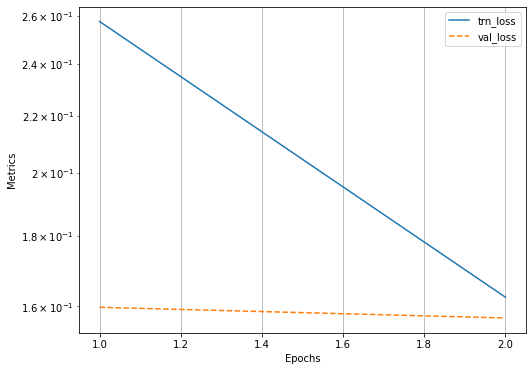

EPOCH: 2.000	trn_loss: 0.134	val_loss: 0.118	(38.62s - 926.79s remaining)


100%|██████████| 151/151 [00:00<00:00, 8546.06it/s]


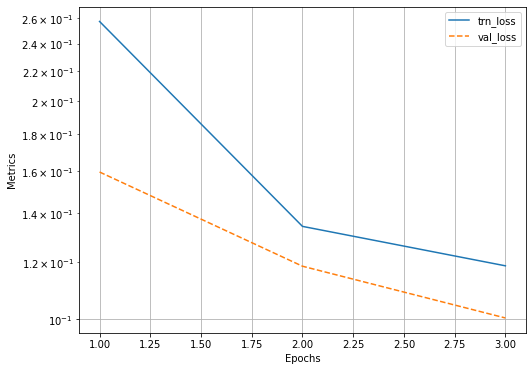

EPOCH: 3.000	trn_loss: 0.111	val_loss: 0.104	(56.92s - 891.78s remaining)


100%|██████████| 151/151 [00:00<00:00, 6381.90it/s]


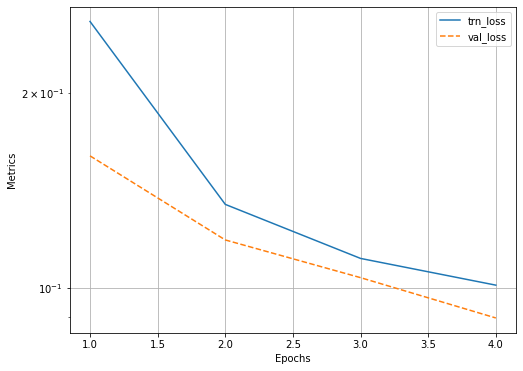

EPOCH: 4.000	trn_loss: 0.101	val_loss: 0.095	(75.16s - 864.29s remaining)


100%|██████████| 151/151 [00:00<00:00, 4801.41it/s]


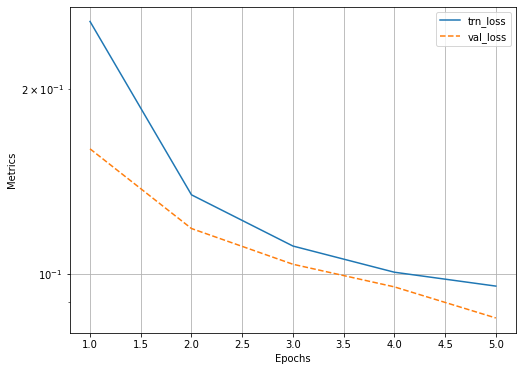

EPOCH: 5.000	trn_loss: 0.094	val_loss: 0.090	(92.82s - 835.37s remaining)


100%|██████████| 151/151 [00:00<00:00, 4234.40it/s]


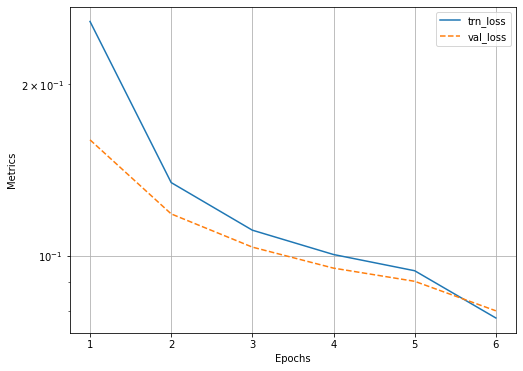

EPOCH: 6.000	trn_loss: 0.090	val_loss: 0.087	(109.80s - 805.17s remaining)


100%|██████████| 151/151 [00:00<00:00, 3161.03it/s]


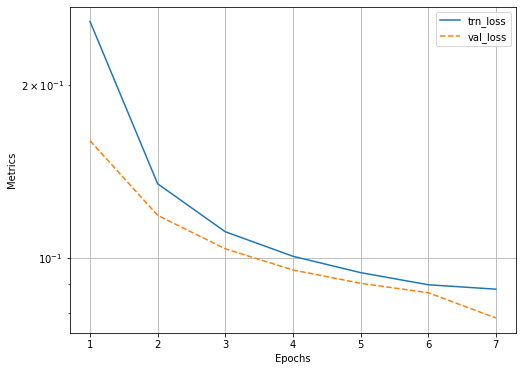

EPOCH: 7.000	trn_loss: 0.087	val_loss: 0.084	(127.71s - 784.50s remaining)


100%|██████████| 151/151 [00:00<00:00, 2673.15it/s]


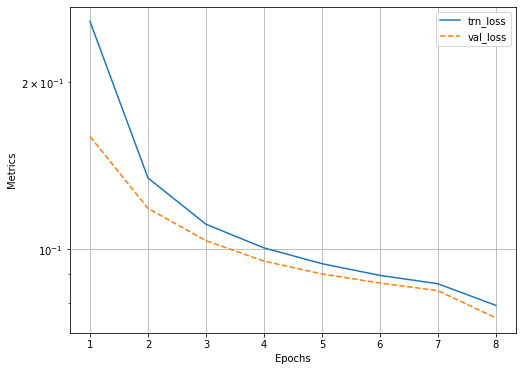

EPOCH: 8.000	trn_loss: 0.084	val_loss: 0.082	(145.73s - 765.08s remaining)


100%|██████████| 151/151 [00:00<00:00, 2323.99it/s]


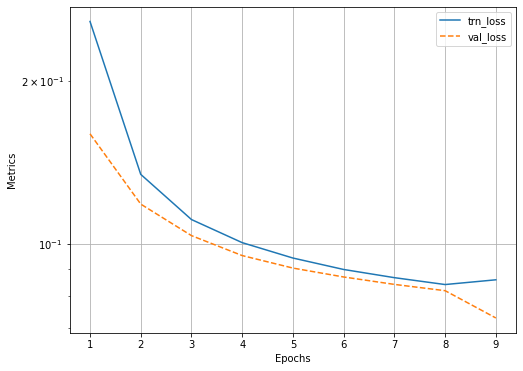

EPOCH: 9.000	trn_loss: 0.082	val_loss: 0.080	(163.77s - 746.07s remaining)


100%|██████████| 151/151 [00:00<00:00, 2154.75it/s]


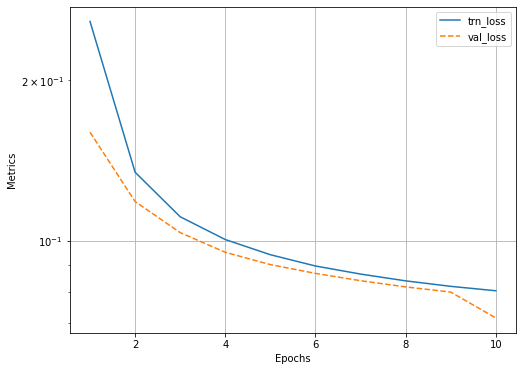

EPOCH: 10.000	trn_loss: 0.080	val_loss: 0.079	(181.34s - 725.37s remaining)


100%|██████████| 151/151 [00:00<00:00, 1906.27it/s]


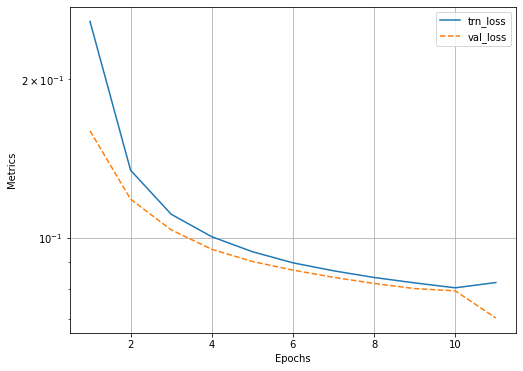

EPOCH: 11.000	trn_loss: 0.079	val_loss: 0.078	(199.47s - 707.21s remaining)


100%|██████████| 151/151 [00:00<00:00, 1407.69it/s]


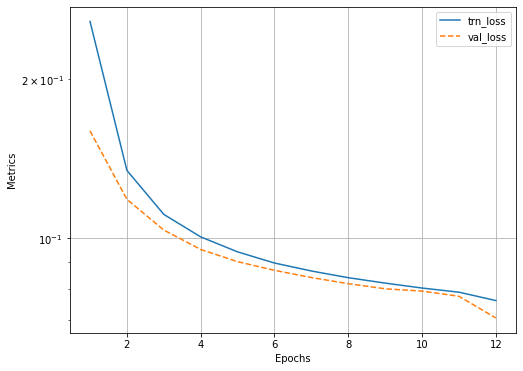

EPOCH: 12.000	trn_loss: 0.078	val_loss: 0.076	(217.46s - 688.61s remaining)


100%|██████████| 151/151 [00:00<00:00, 1386.58it/s]


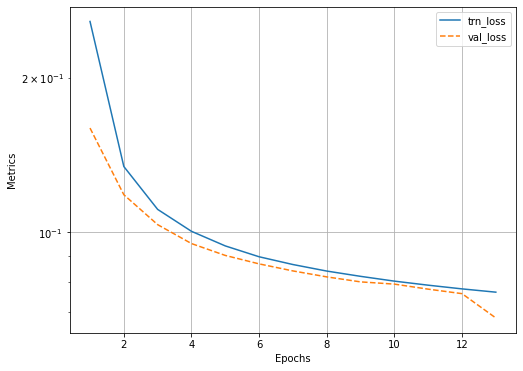

EPOCH: 13.000	trn_loss: 0.076	val_loss: 0.075	(235.37s - 669.91s remaining)


100%|██████████| 151/151 [00:00<00:00, 1226.95it/s]


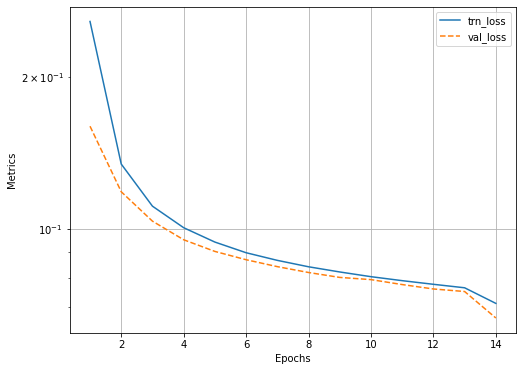

EPOCH: 14.000	trn_loss: 0.075	val_loss: 0.074	(253.96s - 653.03s remaining)


100%|██████████| 151/151 [00:00<00:00, 1184.08it/s]


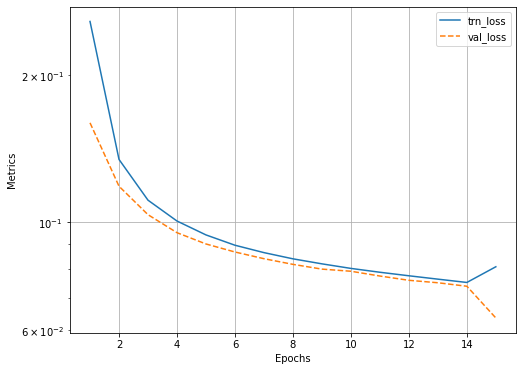

EPOCH: 15.000	trn_loss: 0.074	val_loss: 0.073	(272.09s - 634.88s remaining)


100%|██████████| 151/151 [00:00<00:00, 1172.44it/s]


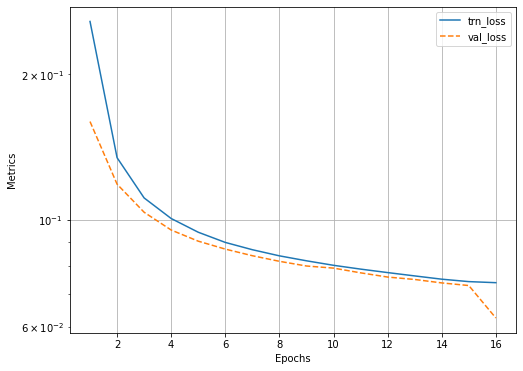

EPOCH: 16.000	trn_loss: 0.073	val_loss: 0.072	(289.99s - 616.22s remaining)


100%|██████████| 151/151 [00:00<00:00, 1102.65it/s]


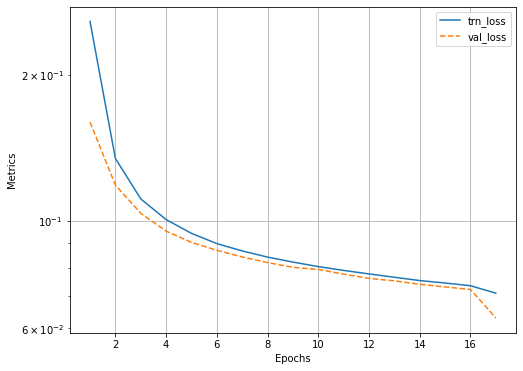

EPOCH: 17.000	trn_loss: 0.073	val_loss: 0.072	(307.87s - 597.64s remaining)


100%|██████████| 151/151 [00:00<00:00, 1015.72it/s]


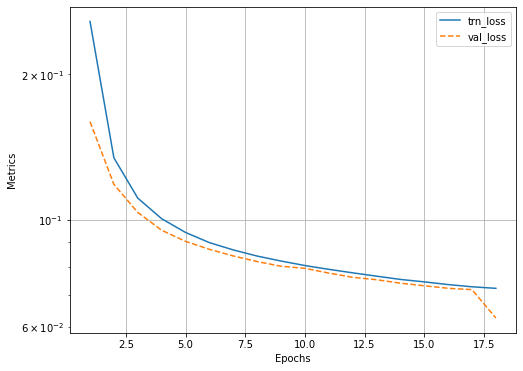

EPOCH: 18.000	trn_loss: 0.072	val_loss: 0.071	(325.99s - 579.53s remaining)


100%|██████████| 151/151 [00:00<00:00, 968.89it/s]


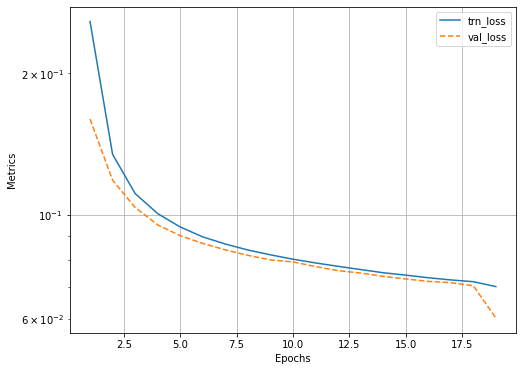

EPOCH: 19.000	trn_loss: 0.071	val_loss: 0.070	(344.02s - 561.30s remaining)


100%|██████████| 151/151 [00:00<00:00, 828.10it/s]


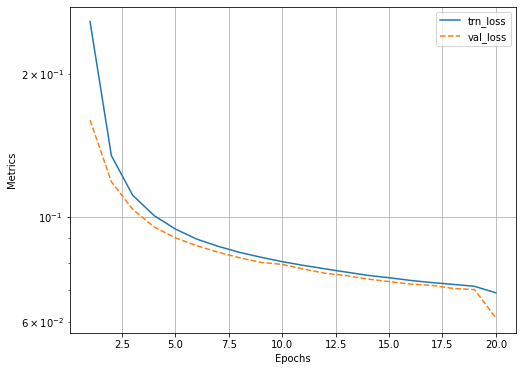

EPOCH: 20.000	trn_loss: 0.071	val_loss: 0.070	(362.06s - 543.09s remaining)


100%|██████████| 151/151 [00:00<00:00, 898.44it/s]


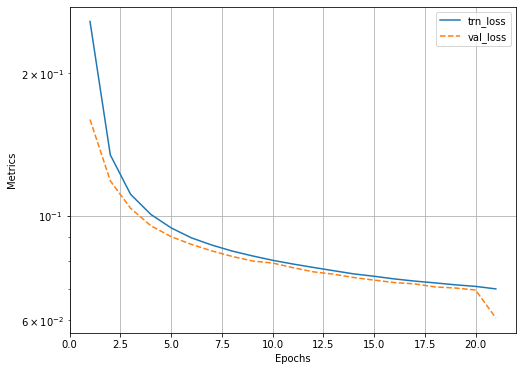

EPOCH: 21.000	trn_loss: 0.070	val_loss: 0.069	(380.10s - 524.90s remaining)


100%|██████████| 151/151 [00:00<00:00, 801.88it/s]


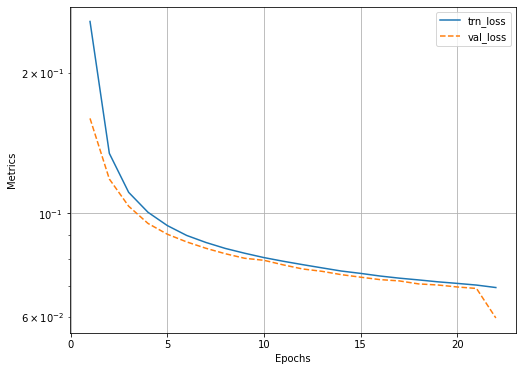

EPOCH: 22.000	trn_loss: 0.070	val_loss: 0.069	(398.13s - 506.71s remaining)


100%|██████████| 151/151 [00:00<00:00, 752.65it/s]


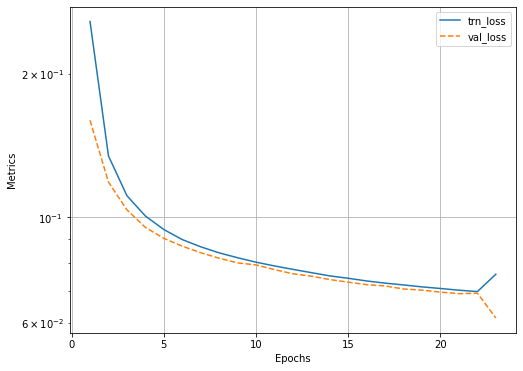

EPOCH: 23.000	trn_loss: 0.069	val_loss: 0.069	(416.27s - 488.66s remaining)


100%|██████████| 151/151 [00:00<00:00, 712.24it/s]


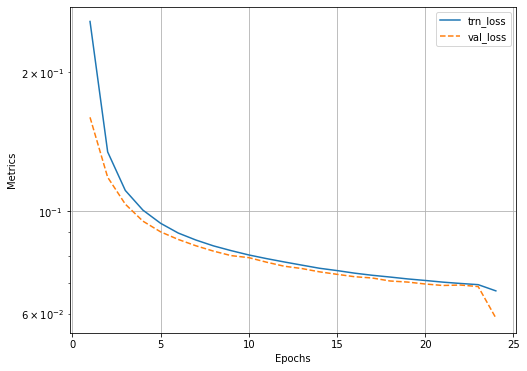

EPOCH: 24.000	trn_loss: 0.069	val_loss: 0.068	(434.43s - 470.64s remaining)


100%|██████████| 151/151 [00:00<00:00, 707.25it/s]


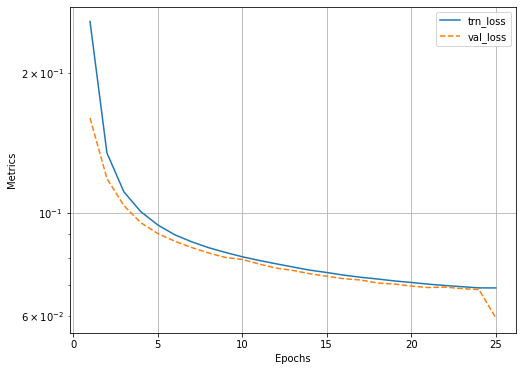

EPOCH: 25.000	trn_loss: 0.068	val_loss: 0.068	(452.60s - 452.60s remaining)


100%|██████████| 151/151 [00:00<00:00, 529.20it/s]


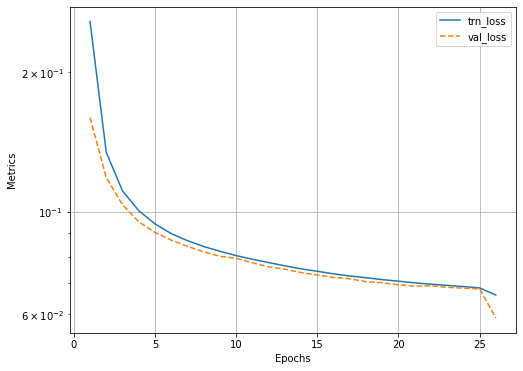

EPOCH: 26.000	trn_loss: 0.068	val_loss: 0.068	(470.88s - 434.66s remaining)


100%|██████████| 151/151 [00:00<00:00, 610.15it/s]


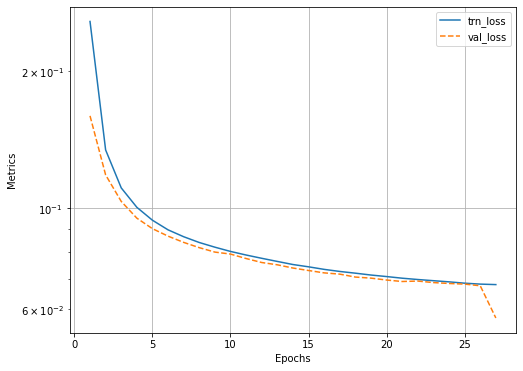

EPOCH: 27.000	trn_loss: 0.068	val_loss: 0.068	(489.81s - 417.25s remaining)


100%|██████████| 151/151 [00:00<00:00, 490.05it/s]


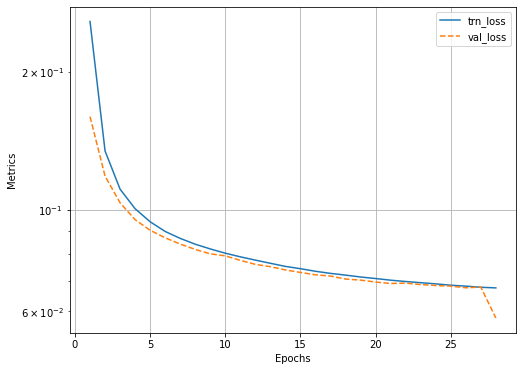

EPOCH: 28.000	trn_loss: 0.067	val_loss: 0.067	(509.59s - 400.39s remaining)


100%|██████████| 151/151 [00:00<00:00, 482.01it/s]


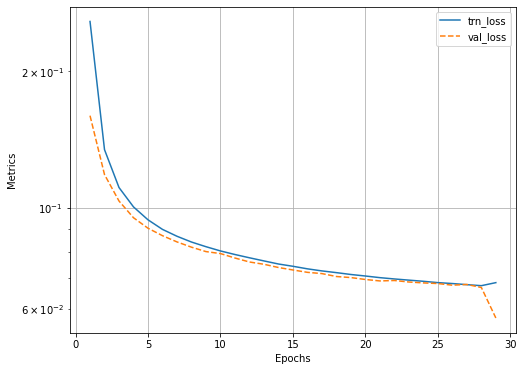

EPOCH: 29.000	trn_loss: 0.067	val_loss: 0.067	(528.62s - 382.79s remaining)


100%|██████████| 151/151 [00:00<00:00, 534.70it/s]


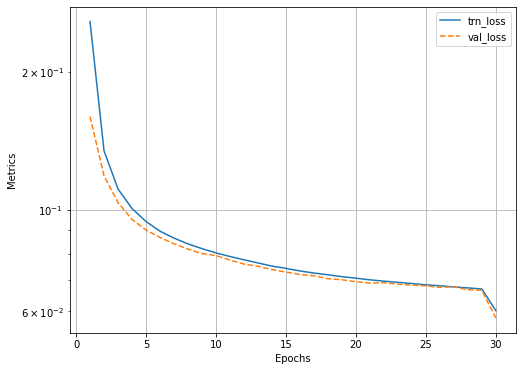

EPOCH: 30.000	trn_loss: 0.067	val_loss: 0.066	(546.92s - 364.62s remaining)


100%|██████████| 151/151 [00:00<00:00, 538.41it/s]


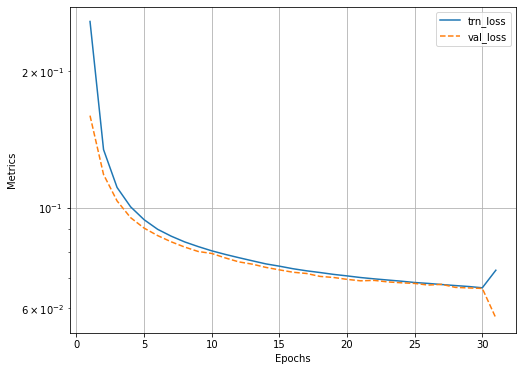

EPOCH: 31.000	trn_loss: 0.066	val_loss: 0.066	(566.11s - 346.97s remaining)


100%|██████████| 151/151 [00:00<00:00, 429.35it/s]


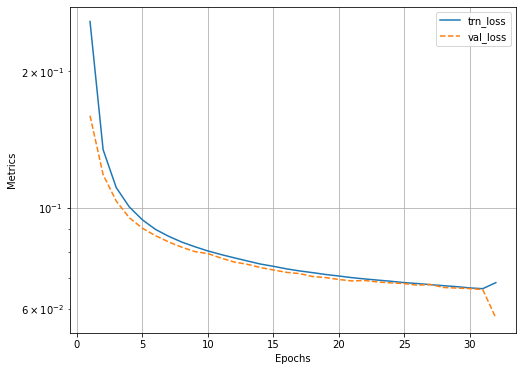

EPOCH: 32.000	trn_loss: 0.066	val_loss: 0.066	(585.37s - 329.27s remaining)


100%|██████████| 151/151 [00:00<00:00, 419.56it/s]


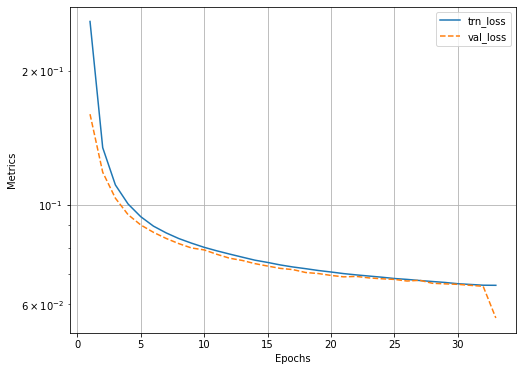

EPOCH: 33.000	trn_loss: 0.066	val_loss: 0.066	(604.37s - 311.34s remaining)


100%|██████████| 151/151 [00:00<00:00, 443.96it/s]


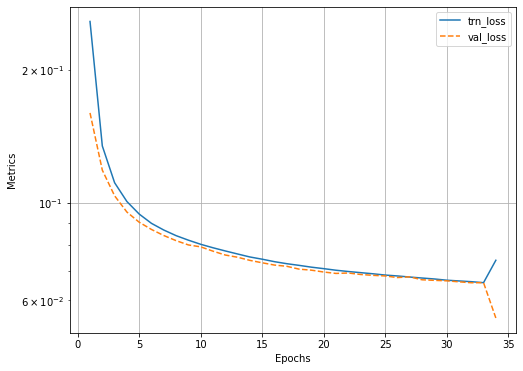

EPOCH: 34.000	trn_loss: 0.066	val_loss: 0.066	(623.29s - 293.31s remaining)


100%|██████████| 151/151 [00:00<00:00, 455.00it/s]


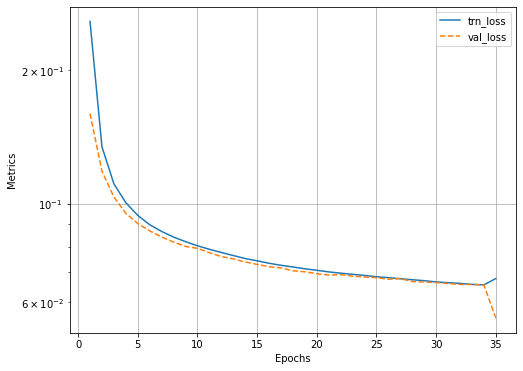

EPOCH: 35.000	trn_loss: 0.065	val_loss: 0.065	(642.20s - 275.23s remaining)


100%|██████████| 151/151 [00:00<00:00, 394.24it/s]


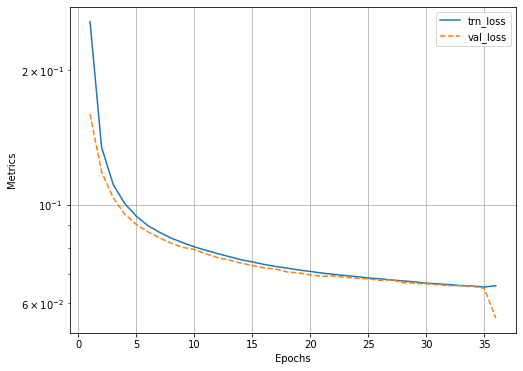

EPOCH: 36.000	trn_loss: 0.065	val_loss: 0.065	(661.67s - 257.32s remaining)


100%|██████████| 151/151 [00:00<00:00, 260.24it/s]


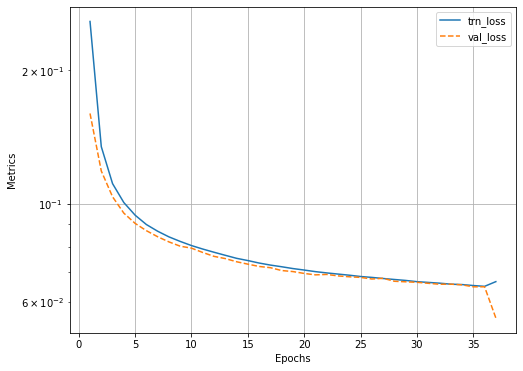

EPOCH: 37.000	trn_loss: 0.065	val_loss: 0.064	(681.14s - 239.32s remaining)


100%|██████████| 151/151 [00:00<00:00, 439.71it/s]


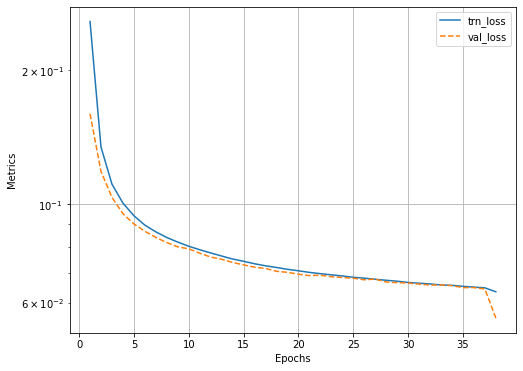

EPOCH: 38.000	trn_loss: 0.064	val_loss: 0.065	(699.65s - 220.94s remaining)


100%|██████████| 151/151 [00:00<00:00, 430.35it/s]


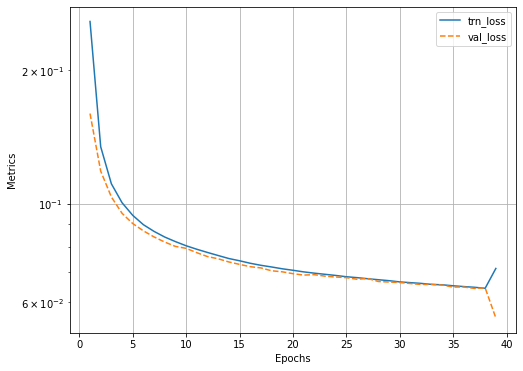

EPOCH: 39.000	trn_loss: 0.064	val_loss: 0.064	(718.26s - 202.59s remaining)


100%|██████████| 151/151 [00:00<00:00, 340.84it/s]


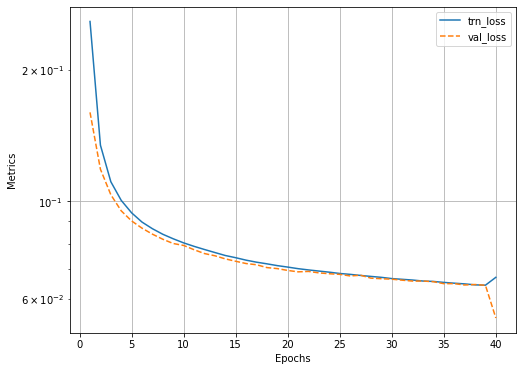

EPOCH: 40.000	trn_loss: 0.064	val_loss: 0.064	(738.30s - 184.58s remaining)


100%|██████████| 151/151 [00:00<00:00, 289.05it/s]


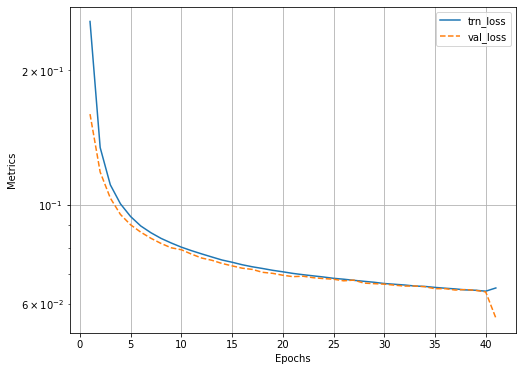

EPOCH: 41.000	trn_loss: 0.064	val_loss: 0.064	(757.73s - 166.33s remaining)


100%|██████████| 151/151 [00:00<00:00, 412.50it/s]


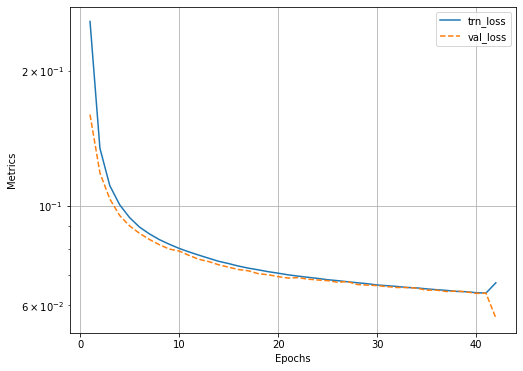

EPOCH: 42.000	trn_loss: 0.064	val_loss: 0.064	(776.20s - 147.85s remaining)


100%|██████████| 151/151 [00:00<00:00, 387.38it/s]


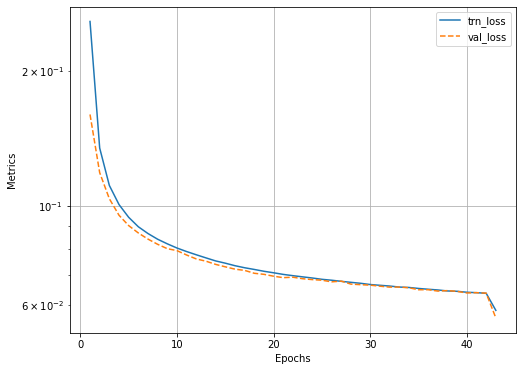

EPOCH: 43.000	trn_loss: 0.063	val_loss: 0.064	(794.75s - 129.38s remaining)


100%|██████████| 151/151 [00:00<00:00, 387.45it/s]


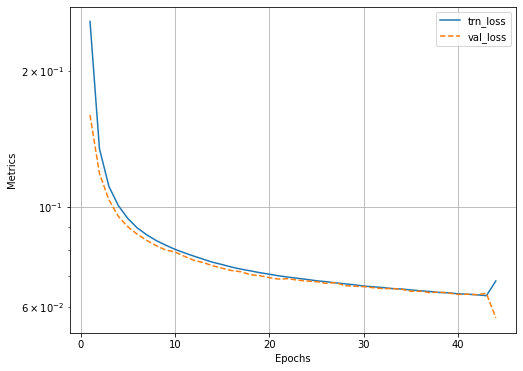

EPOCH: 44.000	trn_loss: 0.063	val_loss: 0.064	(813.38s - 110.92s remaining)


100%|██████████| 151/151 [00:00<00:00, 331.10it/s]


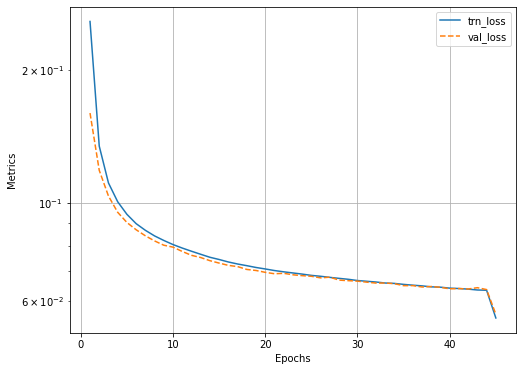

EPOCH: 45.000	trn_loss: 0.063	val_loss: 0.063	(831.51s - 92.39s remaining)


100%|██████████| 151/151 [00:00<00:00, 395.58it/s]


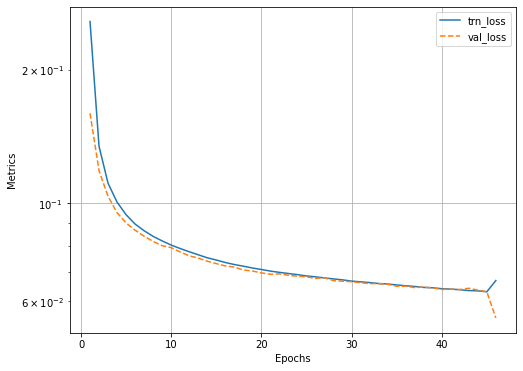

EPOCH: 46.000	trn_loss: 0.063	val_loss: 0.063	(849.29s - 73.85s remaining)


100%|██████████| 151/151 [00:00<00:00, 365.78it/s]


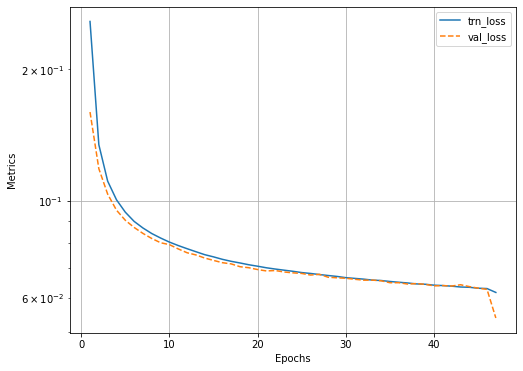

EPOCH: 47.000	trn_loss: 0.063	val_loss: 0.063	(867.43s - 55.37s remaining)


100%|██████████| 151/151 [00:00<00:00, 330.29it/s]


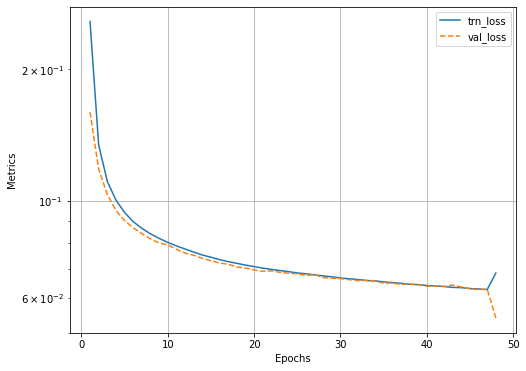

EPOCH: 48.000	trn_loss: 0.063	val_loss: 0.063	(887.70s - 36.99s remaining)


100%|██████████| 151/151 [00:00<00:00, 236.01it/s]


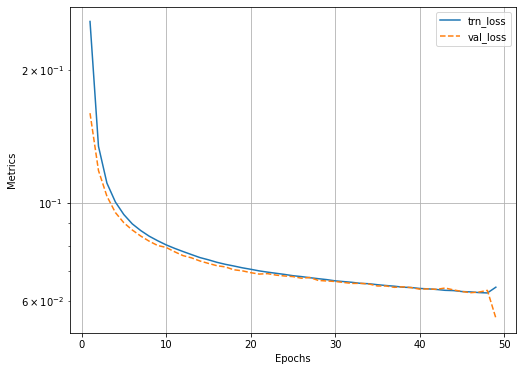

EPOCH: 49.000	trn_loss: 0.062	val_loss: 0.063	(906.90s - 18.51s remaining)


100%|██████████| 151/151 [00:00<00:00, 302.80it/s]


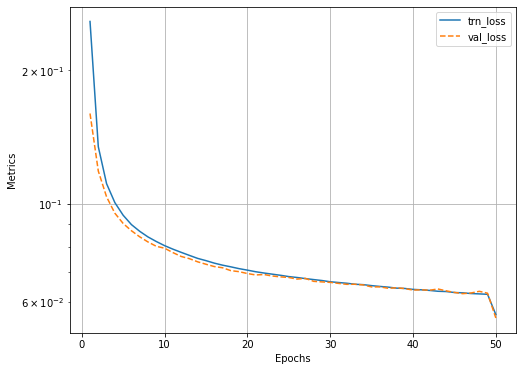

EPOCH: 50.000	trn_loss: 0.062	val_loss: 0.063	(925.77s - 0.00s remaining)


100%|██████████| 151/151 [00:00<00:00, 274.88it/s]


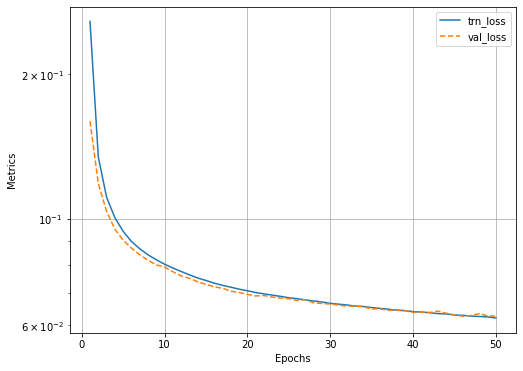

In [8]:
def train_batch(input, model, criterion, optimizer):
    model.train() 
    optimizer.zero_grad()
    output = model(input)
    loss = criterion(output, input)
    loss.backward()
    optimizer.step()
    return loss 

@torch.no_grad()
def validate_batch(input, model, criterion, optimizer):
    model.eval()
    output = model(input)
    loss = criterion(output, input)
    return loss 

model = AutoEncoder(3).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-5)

num_epochs = 5 
log = Report(num_epochs)

for epoch in range(num_epochs):
    N = len(trn_dl)
    for ix, (data, _) in enumerate(trn_dl):
        loss = train_batch(data, model, criterion, optimizer)
        log.record(pos=(epoch + (ix+1)/N), trn_loss=loss, end='\r')
    N = len(val_dl)
    for ix, (data, _) in enumerate(val_dl):
        loss = validate_batch(data, model, criterion, optimizer)
        log.record(pos=(epoch + (ix+1)/N), val_loss=loss, end='\r')
    log.report_avgs(epoch+1)
    log.plot_epochs(log=True)

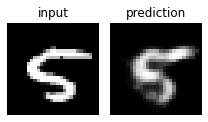

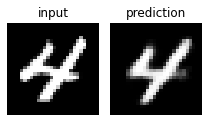

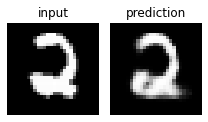

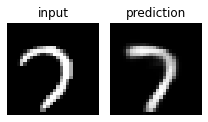

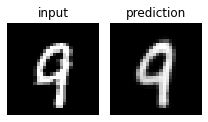

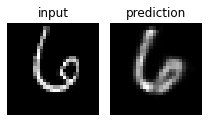

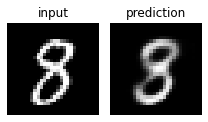

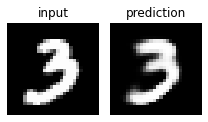

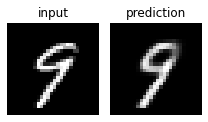

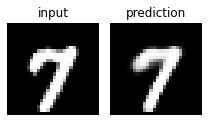

In [9]:
for _ in range(10):
    ix = np.random.randint(len(val_ds))
    im, _ = val_ds[ix]
    _im = model(im[None])[0]
    fig, ax = plt.subplots(1, 2, figsize=(3,3))
    show(im[0], ax=ax[0], title='input')
    show(_im[0], ax=ax[1], title='prediction')
    plt.tight_layout()
    plt.show()

In [12]:
# define path2weights
path2weights="../public/weights/weights.pt"
# store state_dict to file
torch.save(model.state_dict(), path2weights)
# define model: weights are randomly initiated
_model = model
weights=torch.load(path2weights)
_model.load_state_dict(weights)

<All keys matched successfully>

In [13]:
# define a path2model
path2model="../public/models/model.pt"
# store model and weights into a file
torch.save(model,path2model)
# define model: weights are randomly initiated
_model = model
_model=torch.load(path2model)

AttributeError: 'str' object has no attribute 'copy'